In [75]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.datasets as ds
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, f1_score

%matplotlib inline

In [26]:
# Loading data from the inbuilt sklearn datasets
iris_data = ds.load_iris()

# Fetching data
x = iris_data.get('data')
y = iris_data.get('target')
target_names = iris_data.get('target_names')
feature_names = iris_data.get('feature_names')
desc = iris_data.get('DESCR')

In [31]:
# Features prep
x = pd.DataFrame(data = x, columns=feature_names)

# Target prep
y = pd.DataFrame(data = y, columns = ['FlowerType'])
y['FlowerType'] = y.FlowerType.replace({code:f'iris {name}' for name,code in zip(target_names, sorted(y.FlowerType.unique()))})

In [32]:
df = pd.concat((x,y), axis = 'columns')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),FlowerType
0,5.1,3.5,1.4,0.2,iris setosa
1,4.9,3.0,1.4,0.2,iris setosa
2,4.7,3.2,1.3,0.2,iris setosa
3,4.6,3.1,1.5,0.2,iris setosa
4,5.0,3.6,1.4,0.2,iris setosa


In [33]:
df.FlowerType.unique()

array(['iris setosa', 'iris versicolor', 'iris virginica'], dtype=object)

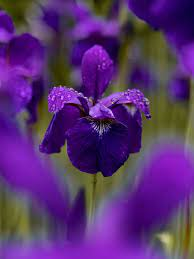

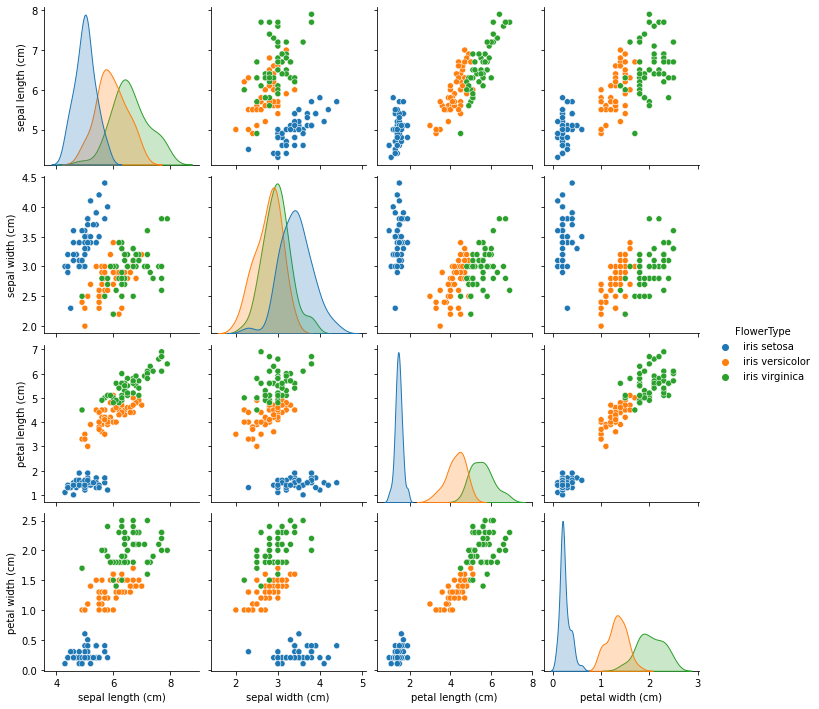

In [36]:
# Plotting the pairplot
sns.pairplot(data=df, hue = 'FlowerType', diag_kind='kde')

In [38]:
# Splitting the data
x,y = df.drop(columns = ['FlowerType']), df[['FlowerType']]

tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=0.3, random_state = 64, stratify=y)

In [39]:
tr_x.shape, ts_x.shape, tr_y.shape, ts_y.shape

((105, 4), (45, 4), (105, 1), (45, 1))

In [40]:
df.FlowerType.value_counts()

iris setosa        50
iris versicolor    50
iris virginica     50
Name: FlowerType, dtype: int64

# LogisticRegression model

In [67]:
# Build the KNN-Classifier
log_reg = LogisticRegression()

# Training the knn model
log_reg.fit(tr_x, tr_y)

# Making predictions
pred_y_lr = log_reg.predict(ts_x)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
accuracy_score(ts_y, pred_y_lr)

0.9777777777777777

In [69]:
f1_score(ts_y, pred_y_lr, average = 'macro')

0.9777530589543938

# KNN model

In [70]:
# Build the KNN-Classifier
knn_c = KNeighborsClassifier(n_neighbors = 5, p = 2, n_jobs = -1)

# Training the knn model
knn_c.fit(tr_x, tr_y)

# Making predictions
pred_y_knn = knn_c.predict(ts_x)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [71]:
accuracy_score(ts_y, pred_y_knn)

0.9777777777777777

In [73]:
f1_score(ts_y, pred_y_knn, average = 'macro')

0.9777530589543938

# Hyperparameter tuning

In [77]:
params_grid = {'n_neighbors' : np.arange(1,15), 
               'weights' : ['uniform', 'distance'], 
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
               'p':[1,2]}

base_model = KNeighborsClassifier(n_jobs=-1)

knn_rcv = RandomizedSearchCV(estimator=base_model, 
                             param_distributions=params_grid,
                             n_iter=100,
                             scoring='precision',
                             cv = 5,
                             random_state = 64, 
                             return_train_score = True)

knn_rcv.fit(tr_x, tr_y)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return sel

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/Users/nilotpalmalakar/minifor

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=64, return_train_score=True,
                   scoring='precision')

In [79]:
knn_rcv.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'algorithm': 'brute'}

In [80]:
knn_rcv.best_score_

nan

In [81]:
knn_rcv.best_estimator_

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=7,
                     weights='distance')

In [83]:
accuracy_score(ts_y, knn_rcv.predict(ts_x))

0.9777777777777777

In [85]:
pred_y = knn_rcv.predict(ts_x)

##### Trying to visualize/decode the predicted probabilities

In [275]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN

In [276]:
df_ = pd.read_csv('Data/titanic_cleaned.csv')
df_.head()

,pclass,survived,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
0,1,1,0,0,211.3375,1,29.0000,0.0,0,0,1,1
1,1,1,1,2,151.5500,1,0.9167,0.0,1,0,1,0
2,1,0,1,2,151.5500,1,2.0000,0.0,0,0,1,0
3,1,0,1,2,151.5500,0,30.0000,0.0,1,0,1,1
4,1,0,1,2,151.5500,1,25.0000,0.0,0,0,1,1


In [277]:
target = ['survived']
x,y = df_.drop(columns = target), df_[target]

In [278]:
# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=0.3, random_state = 64, stratify=y)

In [279]:
tr_x.shape, ts_x.shape, tr_y.shape, ts_y.shape

((914, 11), (392, 11), (914, 1), (392, 1))

In [280]:
adasyn = ADASYN()
x_res, y_res = adasyn.fit_resample(tr_x, tr_y)

In [281]:
lr = LogisticRegression()

lr.fit(x_res, y_res)

y_pred = lr.predict(ts_x)

y_pred_prob = lr.predict_proba(ts_x)

print(confusion_matrix(ts_y, y_pred))

x = pd.concat((ts_x.reset_index(drop=True), ts_y.reset_index(drop=True),pd.DataFrame(data=y_pred_prob, columns=['Pred_0', 'Pred_1'])), axis='columns')

[[180  63]
 [ 44 105]]


/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [282]:
x

,pclass,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc,survived,Pred_0,Pred_1
0,1,1,0,57.0000,1,17.0,0.0,0,0,1,0,1,0.049626,0.950374
1,3,0,1,16.1000,1,44.0,0.0,1,0,1,1,0,0.893963,0.106037
2,3,0,0,7.0500,1,28.0,1.0,1,0,1,1,1,0.900672,0.099328
3,3,2,0,21.6792,1,28.0,1.0,1,0,0,1,0,0.843102,0.156898
4,1,0,0,27.7208,1,28.0,1.0,1,0,0,1,0,0.320386,0.679614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,3,0,0,7.7500,1,21.0,0.0,0,1,0,1,0,0.128488,0.871512
388,2,0,0,10.5000,1,28.0,0.0,1,0,1,1,0,0.701589,0.298411
389,1,0,0,30.5000,1,55.0,0.0,1,0,1,1,0,0.653562,0.346438
390,2,0,0,21.0000,1,35.0,0.0,0,0,1,1,1,0.134312,0.865688


<AxesSubplot: xlabel='Pred_1', ylabel='Count'>

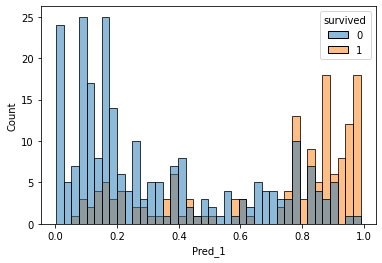

In [283]:
sns.histplot(data=x, x = 'Pred_1', hue = 'survived', bins=40)

##### Selecting some best features-2

In [305]:
df = df_[['sex_male', 'pclass', 'age_imputed', 'survived']]

In [306]:
target = ['survived']
x,y = df.drop(columns = target), df[target]

In [307]:
# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=0.3, random_state = 64, stratify=y)

In [308]:
adasyn = ADASYN()
x_res, y_res = adasyn.fit_resample(tr_x, tr_y)

In [309]:
lr = LogisticRegression()

lr.fit(x_res, y_res)

y_pred = lr.predict(ts_x)

y_pred_prob = lr.predict_proba(ts_x)

print(confusion_matrix(ts_y, y_pred))

x = pd.concat((ts_x.reset_index(drop=True), ts_y.reset_index(drop=True),pd.DataFrame(data=y_pred_prob, columns=['Pred_0', 'Pred_1'])), axis='columns')

[[163  80]
 [ 36 113]]


/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [310]:
x

,sex_male,pclass,age_imputed,survived,Pred_0,Pred_1
0,0,1,17.0,1,0.033738,0.966262
1,1,3,44.0,0,0.897333,0.102667
2,1,3,28.0,1,0.829355,0.170645
3,1,3,28.0,0,0.829355,0.170645
4,1,1,28.0,0,0.416238,0.583762
...,...,...,...,...,...,...
387,0,3,21.0,0,0.216058,0.783942
388,1,2,28.0,0,0.650540,0.349460
389,1,1,55.0,0,0.657488,0.342512
390,0,2,35.0,1,0.149960,0.850040


<AxesSubplot: xlabel='Pred_1', ylabel='Count'>

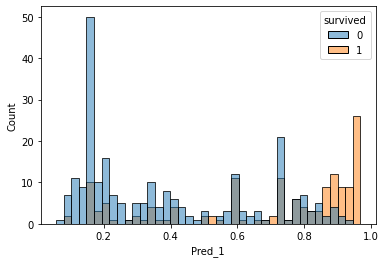

In [311]:
sns.histplot(data=x, x = 'Pred_1', hue = 'survived', bins=40)

##### Selecting some best features-2

In [298]:
df = df_[['sex_male', 'age_imputed', 'survived']]

In [299]:
target = ['survived']
x,y = df.drop(columns = target), df[target]

In [300]:
# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=0.3, random_state = 64, stratify=y)

In [301]:
adasyn = ADASYN()
x_res, y_res = adasyn.fit_resample(tr_x, tr_y)

In [302]:
lr = LogisticRegression()

lr.fit(x_res, y_res)

y_pred = lr.predict(ts_x)

y_pred_prob = lr.predict_proba(ts_x)

print(confusion_matrix(ts_y, y_pred))

x = pd.concat((ts_x.reset_index(drop=True), ts_y.reset_index(drop=True),pd.DataFrame(data=y_pred_prob, columns=['Pred_0', 'Pred_1'])), axis='columns')

[[186  57]
 [ 51  98]]


/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [303]:
x

,sex_male,age_imputed,survived,Pred_0,Pred_1
0,0,17.0,1,0.160531,0.839469
1,1,44.0,0,0.740421,0.259579
2,1,28.0,1,0.714387,0.285613
3,1,28.0,0,0.714387,0.285613
4,1,28.0,0,0.714387,0.285613
...,...,...,...,...,...
387,0,21.0,0,0.165007,0.834993
388,1,28.0,0,0.714387,0.285613
389,1,55.0,0,0.757401,0.242599
390,0,35.0,1,0.181460,0.818540


<AxesSubplot: xlabel='Pred_1', ylabel='Count'>

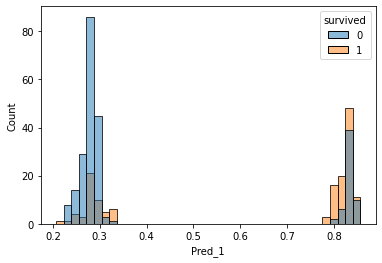

In [304]:
sns.histplot(data=x, x = 'Pred_1', hue = 'survived', bins=40)

In [96]:
from sklearn.datasets import make_classification

In [101]:
data = make_classification(n_samples=10000, n_features=10, n_classes = 6, random_state = 64, n_informative=10, n_redundant=0, n_repeated=0,n_clusters_per_class=1)

In [109]:
features = pd.DataFrame(data=data[0], columns = list('abcdefghij'))
target = pd.DataFrame(data=data[1], columns = ['Target'])

In [110]:
data = pd.concat((features, target), axis = 'columns')

In [111]:
data

,a,b,c,d,e,f,g,h,i,j,Target
0,-0.414699,0.143025,0.584254,0.325321,1.844205,1.348019,-1.281660,0.021987,2.306678,2.405664,1
1,-5.005127,0.625559,6.223731,2.107039,0.613073,3.033982,-0.880094,2.707269,-0.114379,0.525621,1
2,2.177452,-4.100794,3.044521,0.618523,-2.295672,0.582454,2.725615,-0.350123,-0.270268,1.641778,5
3,2.467946,-0.202505,-0.759850,2.056000,2.208988,-3.162769,-2.251473,2.380902,1.941266,-0.215405,5
4,-1.684380,-4.108771,-1.870838,-2.812092,3.738820,-0.547247,0.672814,1.398612,2.755326,-1.476580,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.809079,-0.533695,2.160564,0.873863,-0.860630,-1.086617,0.813837,1.744954,2.935690,1.704614,5
9996,-3.318426,-0.940850,-0.302198,4.514468,2.923090,-1.338424,0.861458,-2.644539,-1.219397,-1.274236,4
9997,-3.764856,0.082422,2.556746,-1.883870,2.011905,-0.113305,0.998336,2.630756,1.966275,4.147128,3
9998,-0.972559,1.618996,-0.099493,2.003374,3.853248,1.217125,1.835472,1.482056,2.643121,-2.181321,3


In [114]:
target = ['Target']
x,y = data.drop(columns = target), data[target]

# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=0.2, random_state = 64, stratify=y)

In [115]:
tr_x.shape, ts_x.shape, tr_y.shape, ts_y.shape

((8000, 10), (2000, 10), (8000, 1), (2000, 1))

In [116]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(tr_x, tr_y)

y_pred = knn.predict(ts_x)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [121]:
y_pred_probs = knn.predict_proba(ts_x)

In [117]:
confusion_matrix(ts_y, y_pred)

array([[320,   4,   0,   6,   1,   4],
       [ 13, 284,   6,  17,   3,  10],
       [ 10,   7, 298,  10,   9,   1],
       [  6,   6,   5, 302,  13,   2],
       [  3,   9,  14,  14, 291,   0],
       [ 10,  13,   5,   4,   2, 298]])

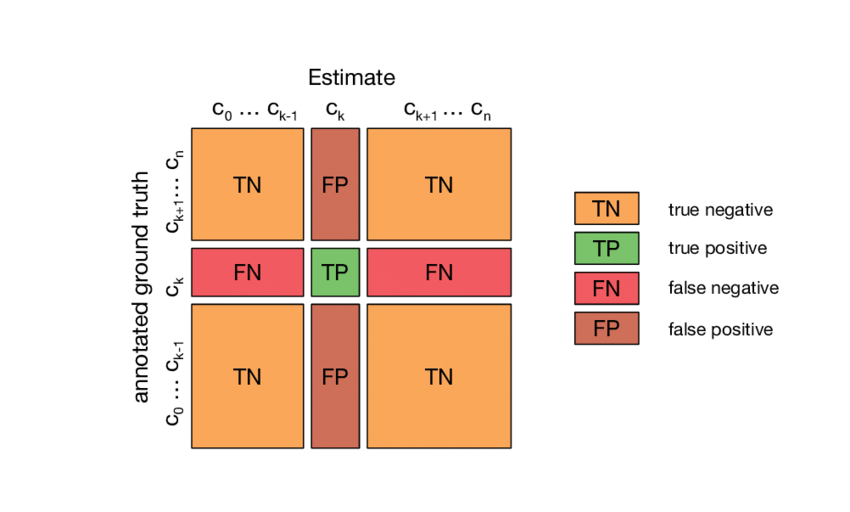

In [119]:
ts_y.nunique()

Target    6
dtype: int64

In [123]:
y_pred_probs.shape

(2000, 6)

In [ ]:
# There are six distinct classes

##### Working on class 0 only

In [136]:
ts_y_0 = (ts_y==0).astype(int)
ts_y_1 = (ts_y==1).astype(int)
ts_y_2 = (ts_y==2).astype(int)
ts_y_3 = (ts_y==3).astype(int)
ts_y_4 = (ts_y==4).astype(int)
ts_y_5 = (ts_y==5).astype(int)

test_data = [ts_y_0,ts_y_1,ts_y_2, ts_y_3,ts_y_4,ts_y_5]

In [137]:
y_pred_prob_0 = y_pred_probs[:,0]
y_pred_prob_1 = y_pred_probs[:,1]
y_pred_prob_2 = y_pred_probs[:,2]
y_pred_prob_3 = y_pred_probs[:,3]
y_pred_prob_4 = y_pred_probs[:,4]
y_pred_prob_5 = y_pred_probs[:,5]

pred_prob_data = [y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_prob_4,y_pred_prob_5]

In [132]:
roc_auc_score(ts_y_0, y_pred_prob_0)

0.9829590784814666

In [134]:
fpr, tpr, thresh = roc_curve(ts_y_0, y_pred_prob_0)

<AxesSubplot: >

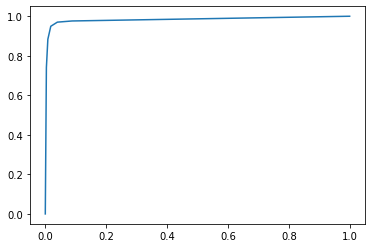

In [135]:
sns.lineplot(x = fpr, y = tpr)

auc=0.9829590784814666
auc=0.9724865837643282
auc=0.9801084666756308
auc=0.9780292356463544
auc=0.9814920742380606
auc=0.9872872786108463


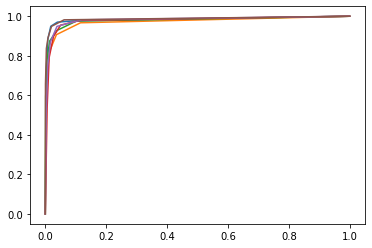

In [138]:
for ts, pred_prob in zip(test_data, pred_prob_data):
    auc = roc_auc_score(ts, pred_prob)
    print(f'{auc=}')
    fpr, tpr, thresh = roc_curve(ts, pred_prob)
    sns.lineplot(x = fpr, y = tpr)
plt.show()

<AxesSubplot: ylabel='Count'>

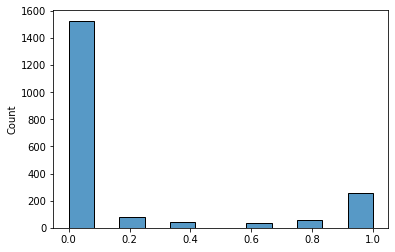

In [139]:
sns.histplot(pred_prob_data[0])

## KNN Regressor

In [58]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
knn_reg = KNeighborsRegressor(n_neighbors=8, p = 2, n_jobs = -1)

In [3]:
df = pd.read_csv('Data/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df = df[['fueltype', 'doornumber', 'drivewheel', 'cylindernumber', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','price']]

In [6]:
df.head()

,fueltype,doornumber,drivewheel,cylindernumber,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,gas,two,rwd,four,2.68,9.0,111,5000,21,13495.0
1,gas,two,rwd,four,2.68,9.0,111,5000,21,16500.0
2,gas,two,rwd,six,3.47,9.0,154,5000,19,16500.0
3,gas,four,fwd,four,3.40,10.0,102,5500,24,13950.0
4,gas,four,4wd,five,3.40,8.0,115,5500,18,17450.0


In [7]:
df.isna().sum()

fueltype            0
doornumber          0
drivewheel          0
cylindernumber      0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
price               0
dtype: int64

In [8]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [9]:
df['fueltype_enc'] = df.fueltype.replace({'gas':0, 'diesel':1})
df['doornumbers_enc'] = df.doornumber.replace({'four':4, 'two':2})
df['drivewheel_enc'] = df.drivewheel.replace({'fwd':0, 'rwd':1, '4wd':2})
df['cylindernumber_enc'] = df.cylindernumber.replace({'four':4, 'six':6, 'five':5, 'eight':8, 'two':2, 'three':3, 'twelve':12})

In [10]:
df.head(3)

,fueltype,doornumber,drivewheel,cylindernumber,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_enc,doornumbers_enc,drivewheel_enc,cylindernumber_enc
0,gas,two,rwd,four,2.68,9.0,111,5000,21,13495.0,0,2,1,4
1,gas,two,rwd,four,2.68,9.0,111,5000,21,16500.0,0,2,1,4
2,gas,two,rwd,six,3.47,9.0,154,5000,19,16500.0,0,2,1,6


In [14]:
df = df.drop(columns = ['fueltype', 'doornumber', 'drivewheel', 'cylindernumber'], axis = 'columns')
df.head(3)

,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_enc,doornumbers_enc,drivewheel_enc,cylindernumber_enc
0,2.68,9.0,111,5000,21,13495.0,0,2,1,4
1,2.68,9.0,111,5000,21,16500.0,0,2,1,4
2,3.47,9.0,154,5000,19,16500.0,0,2,1,6


In [16]:
x, y = df.drop('price', axis = 'columns'), df[['price']]

In [20]:
x.shape

(205, 9)

In [22]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y, test_size = 0.35, random_state = 64)

In [23]:
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((133, 9), (72, 9), (133, 1), (72, 1))

In [25]:
lin_reg = LinearRegression()

lin_reg.fit(x_tr, y_tr)

y_pred_lr = lin_reg.predict(x_ts)

r2_score(y_ts, y_pred_lr)

0.7995494179541607

In [26]:
knn_reg = KNeighborsRegressor()

knn_reg.fit(x_tr, y_tr)

y_pred_knn = knn_reg.predict(x_ts)

r2_score(y_ts, y_pred_knn)

0.431571382367833

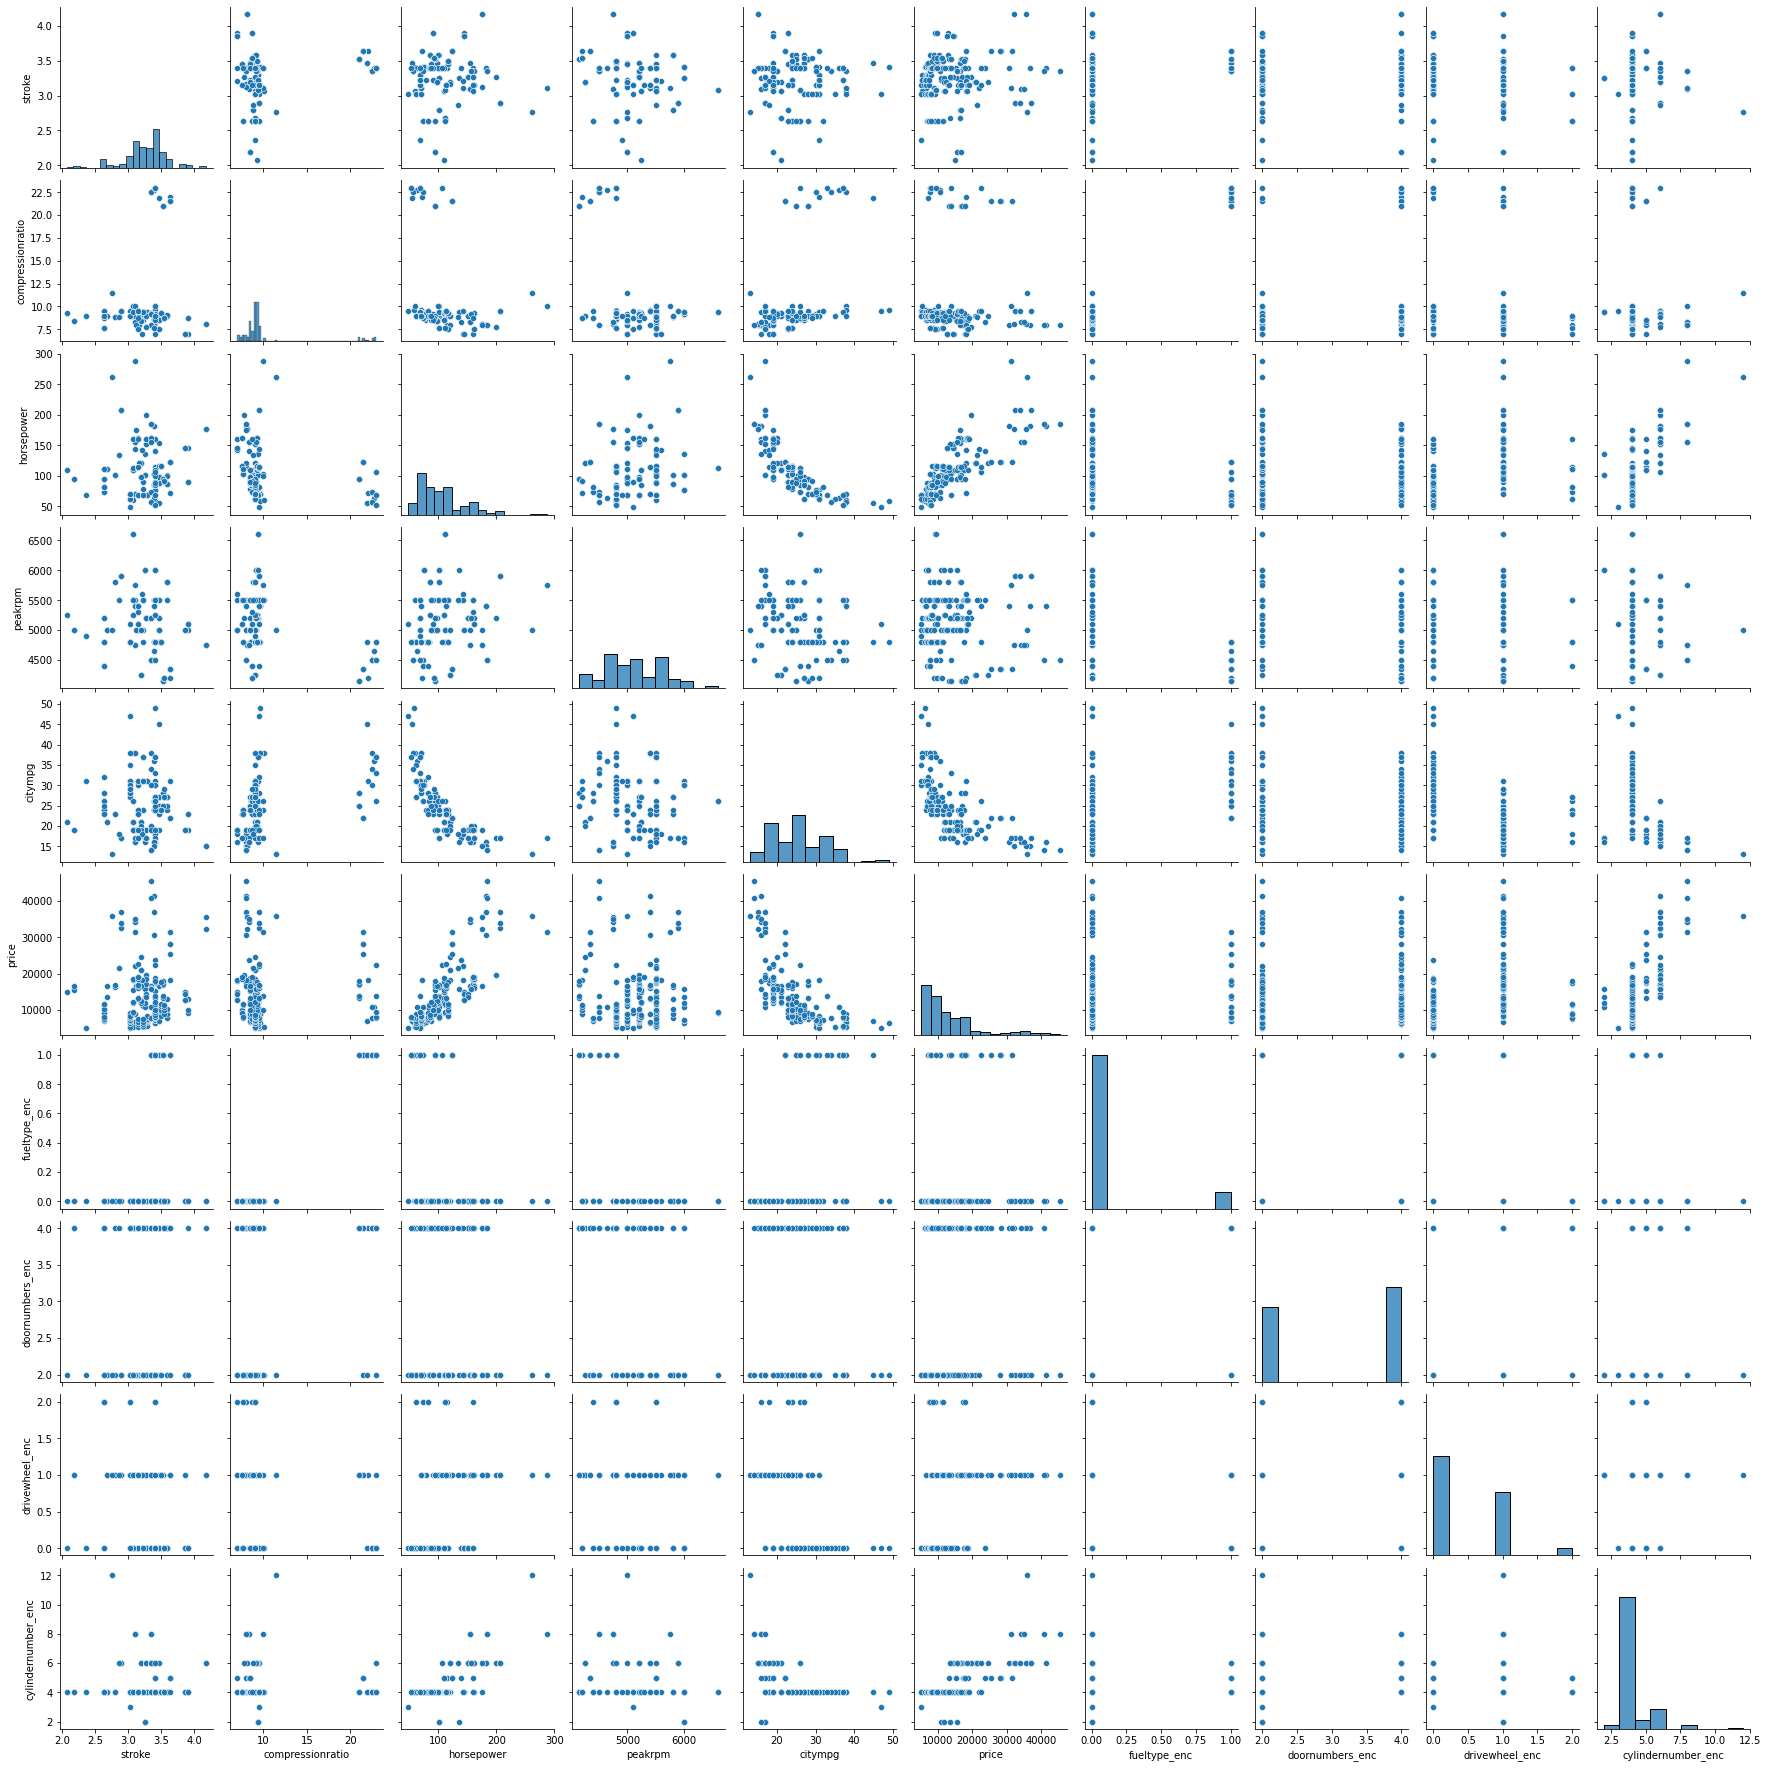

In [29]:
sns.pairplot(df)

In [44]:
ss_tr = StandardScaler()
ss_ts = StandardScaler()

In [45]:
tr_sc_x = ss_tr.fit_transform(x_tr)
ts_sc_x = ss_ts.fit_transform(x_ts)

In [46]:
lin_reg = LinearRegression()

lin_reg.fit(tr_sc_x, y_tr)

y_pred_lr = lin_reg.predict(ts_sc_x)

r2_score(y_ts, y_pred_lr)

0.7936092259401535

In [47]:
knn_reg = KNeighborsRegressor()

knn_reg.fit(tr_sc_x, y_tr)

y_pred_knn = knn_reg.predict(ts_sc_x)

r2_score(y_ts, y_pred_knn)

0.7348527482030253

In [48]:
mm_tr = MinMaxScaler()
mm_ts = MinMaxScaler()

In [49]:
tr_sc_x = mm_tr.fit_transform(x_tr)
ts_sc_x = mm_ts.fit_transform(x_ts)

In [37]:
lin_reg = LinearRegression()

lin_reg.fit(tr_sc_x, y_tr)

y_pred_lr = lin_reg.predict(ts_sc_x)

r2_score(y_ts, y_pred_lr)

0.7447715633360287

In [38]:
knn_reg = KNeighborsRegressor()

knn_reg.fit(tr_sc_x, y_tr)

y_pred_knn = knn_reg.predict(ts_sc_x)

r2_score(y_ts, y_pred_knn)

0.7589449017662919

In [71]:
base_estimator = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(4, 12), 
              'weights' : ['uniform', 'distance'], 
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size' : np.arange(10, 50, 5), 
              'p' : [1,2]}

knn_grid = GridSearchCV(estimator = base_estimator, 
                        param_grid = param_grid, 
                        scoring = 'neg_mean_absolute_error', 
                        n_jobs = -1, 
                        return_train_score = True)

In [72]:
knn_grid.fit(tr_sc_x, y_tr)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([10, 15, 20, 25, 30, 35, 40, 45]),
                         'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [73]:
knn_grid.best_score_

-2587.515633283262

In [74]:
knn_grid.best_estimator_

KNeighborsRegressor(leaf_size=10, n_neighbors=4, p=1, weights='distance')

In [77]:
scores_df = pd.DataFrame(knn_grid.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009320,0.006717,0.003493,0.002273,auto,10,4,1,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",...,-2875.843172,440.576496,289,-2204.333724,-2146.826651,-2145.096696,-2154.135512,-2095.625002,-2149.203517,34.516190
1,0.006932,0.005068,0.005566,0.004535,auto,10,4,1,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",...,-2587.515633,550.986019,1,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
2,0.001532,0.000754,0.001367,0.000857,auto,10,4,2,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",...,-3159.269098,537.776948,694,-2425.814856,-2366.694575,-2461.846696,-2224.976633,-2246.557245,-2345.178001,94.605784
3,0.001601,0.000487,0.001528,0.000724,auto,10,4,2,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",...,-2845.754157,562.625830,281,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
4,0.001074,0.000451,0.001025,0.000565,auto,10,5,1,uniform,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",...,-2898.001014,515.746489,353,-2383.937419,-2181.101887,-2393.414777,-2289.508097,-2163.558258,-2282.304088,97.025022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.000397,0.000012,0.000476,0.000014,brute,45,10,2,distance,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei...",...,-3065.503661,577.980465,595,-330.014444,-206.261350,-326.602498,-245.478359,-329.959843,-287.663299,51.970616
1020,0.000558,0.000335,0.000579,0.000201,brute,45,11,1,uniform,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei...",...,-3276.666707,402.335160,800,-2838.313319,-2591.987564,-3042.213262,-2979.071223,-2811.849756,-2852.687025,156.033108
1021,0.000635,0.000293,0.000734,0.000334,brute,45,11,1,distance,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei...",...,-2843.509041,503.256516,250,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
1022,0.000831,0.000416,0.000931,0.000482,brute,45,11,2,uniform,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei...",...,-3687.891421,413.410256,1014,-3077.545023,-2796.570326,-3386.247567,-3379.726137,-3066.795805,-3141.376972,221.495112


In [79]:
scores_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algorithm', 'param_leaf_size', 'param_n_neighbors', 'param_p',
       'param_weights', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [82]:
scores_ = scores_df[['rank_test_score', 'mean_test_score', 'mean_train_score', 'mean_score_time', 'params']]
scores_ = scores_.sort_values(by = 'rank_test_score')
scores_.head(10)

,rank_test_score,mean_test_score,mean_train_score,mean_score_time,params
1,1,-2587.515633,-287.663011,0.005566,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
513,1,-2587.515633,-287.663011,0.000494,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n..."
769,3,-2588.861581,-287.663011,0.001119,"{'algorithm': 'brute', 'leaf_size': 10, 'n_nei..."
993,3,-2588.861581,-287.663011,0.000485,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei..."
801,3,-2588.861581,-287.663011,0.000736,"{'algorithm': 'brute', 'leaf_size': 15, 'n_nei..."
929,3,-2588.861581,-287.663011,0.001116,"{'algorithm': 'brute', 'leaf_size': 35, 'n_nei..."
897,3,-2588.861581,-287.663011,0.001355,"{'algorithm': 'brute', 'leaf_size': 30, 'n_nei..."
865,3,-2588.861581,-287.663011,0.000500,"{'algorithm': 'brute', 'leaf_size': 25, 'n_nei..."
833,3,-2588.861581,-287.663011,0.001181,"{'algorithm': 'brute', 'leaf_size': 20, 'n_nei..."
961,3,-2588.861581,-287.663011,0.000850,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei..."


In [90]:
scores_.iloc[993].params

{'algorithm': 'kd_tree',
 'leaf_size': 25,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [88]:
for i in scores_.params.values:
    print(i)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 45, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'brute', 'leaf_size': 40, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'ball_tree', 'leaf_size': 45, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'algorithm': 'b

In [78]:
scores_df.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.006932,0.005068,0.005566,0.004535,auto,10,4,1,distance,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",...,-2587.515633,550.986019,1,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
513,0.000474,0.000009,0.000494,0.000006,kd_tree,10,4,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",...,-2587.515633,550.986019,1,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
769,0.001062,0.000626,0.001119,0.000488,brute,10,4,1,distance,"{'algorithm': 'brute', 'leaf_size': 10, 'n_nei...",...,-2588.861581,556.646165,3,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
993,0.000405,0.000007,0.000485,0.000010,brute,45,4,1,distance,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei...",...,-2588.861581,556.646165,3,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
801,0.000574,0.000268,0.000736,0.000312,brute,15,4,1,distance,"{'algorithm': 'brute', 'leaf_size': 15, 'n_nei...",...,-2588.861581,556.646165,3,-330.014151,-206.261006,-326.602201,-245.478193,-329.959502,-287.663011,51.970603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,0.000837,0.000321,0.000821,0.000353,brute,35,11,2,uniform,"{'algorithm': 'brute', 'leaf_size': 35, 'n_nei...",...,-3687.891421,413.410256,1014,-3077.545023,-2796.570326,-3386.247567,-3379.726137,-3066.795805,-3141.376972,221.495112
1022,0.000831,0.000416,0.000931,0.000482,brute,45,11,2,uniform,"{'algorithm': 'brute', 'leaf_size': 45, 'n_nei...",...,-3687.891421,413.410256,1014,-3077.545023,-2796.570326,-3386.247567,-3379.726137,-3066.795805,-3141.376972,221.495112
382,0.000460,0.000003,0.000477,0.000005,ball_tree,25,11,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 25, 'n...",...,-3690.870701,395.217964,1022,-3067.570752,-2790.824185,-3384.189248,-3377.593596,-3071.866324,-3138.408821,222.655963
350,0.000631,0.000292,0.000540,0.000048,ball_tree,20,11,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'n...",...,-3690.870701,395.217964,1022,-3067.570752,-2790.824185,-3384.189248,-3377.593596,-3071.866324,-3138.408821,222.655963


In [64]:
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',